In [468]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from jupyterthemes import jtplot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
jtplot.style('monokai')

# Import Data

In [445]:
path="/Users/vincentpeng/Documents/Spotify_Project/Music/rock_music_data.csv"
path_2="/Users/vincentpeng/Documents/Spotify_Project/Music/blues_music_data.csv"
path_3="/Users/vincentpeng/Documents/Spotify_Project/Music/hiphop_music_data.csv"
path_4="/Users/vincentpeng/Documents/Spotify_Project/Music/indie_alt_music_data.csv"
path_5="/Users/vincentpeng/Documents/Spotify_Project/Music/metal_music_data.csv"
path_6="/Users/vincentpeng/Documents/Spotify_Project/Music/pop_music_data.csv"
path_7="/Users/vincentpeng/Documents/Spotify_Project/Music/alternative_music_data.csv"
df_1=pd.read_csv(path)
df_2=pd.read_csv(path_2)
df_3=pd.read_csv(path_3)
df_4=pd.read_csv(path_4)
df_5=pd.read_csv(path_5)
df_6=pd.read_csv(path_6)
df_7=pd.read_csv(path_7)

df_1['Popularity']=df_1['Popularity']*0.01
df_2['Popularity']=df_2['Popularity']*0.01
df_3['Popularity']=df_3['Popularity']*0.01
df_4['Popularity']=df_4['Popularity']*0.01
df_5['Popularity']=df_5['Popularity']*0.01
df_6['Popularity']=df_6['Popularity']*0.01
df_7['Popularity']=df_7['Popularity']*0.01

Genres=['rock','hiphop','metal','pop']
df_music=pd.concat([df_1,df_3,df_5,df_6],keys=['rock','hiphop','metal','pop'])

In [446]:
#print(df_music['Genres'].unique())
#df_music.groupby(['Genres']).get_group()
df_music.loc['rock']

,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,God Street Wine,Nightingale,0.05,['jam band'],The Lot,0.732,0.710,10,-10.429,1,...,0.005720,0.4570,0.8250,123.098,6A9mRe1Eg6jUBaiLu1ppAJ,spotify:track:6A9mRe1Eg6jUBaiLu1ppAJ,https://api.spotify.com/v1/tracks/6A9mRe1Eg6jU...,https://api.spotify.com/v1/audio-analysis/6A9m...,352839,4
1,cleopatrick,hometown,0.63,"['modern alternative rock', 'modern blues rock...",Ultimate Rock Gaming,0.315,0.826,7,-4.314,0,...,0.000687,0.0703,0.3590,139.161,6p8DGrcAUBuLUgDIKcUn0P,spotify:track:6p8DGrcAUBuLUgDIKcUn0P,https://api.spotify.com/v1/tracks/6p8DGrcAUBuL...,https://api.spotify.com/v1/audio-analysis/6p8D...,256072,4
2,grandson,In Over My Head,0.60,"['modern alternative rock', 'modern rock', 'ro...",Alternative Beats,0.582,0.817,0,-6.475,1,...,0.015800,0.5750,0.6220,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4
3,Counting Crows,Bobby and the Rat-Kings,0.00,"['alternative rock', 'neo mellow', 'pop rock',...",All New Rock,0.470,0.881,5,-4.529,1,...,0.000000,0.0856,0.4220,141.837,4g3abvA9DjKbjAoRDHWRsx,spotify:track:4g3abvA9DjKbjAoRDHWRsx,https://api.spotify.com/v1/tracks/4g3abvA9DjKb...,https://api.spotify.com/v1/audio-analysis/4g3a...,324867,4
4,Led Zeppelin,Black Dog - Remaster,0.72,"['album rock', 'classic rock', 'hard rock', 'r...",70s Rock Anthems,0.437,0.864,4,-7.842,0,...,0.031400,0.2420,0.7490,81.394,3qT4bUD1MaWpGrTwcvguhb,spotify:track:3qT4bUD1MaWpGrTwcvguhb,https://api.spotify.com/v1/tracks/3qT4bUD1MaWp...,https://api.spotify.com/v1/audio-analysis/3qT4...,295387,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,blink-182,I Miss You,0.00,"['pop punk', 'punk', 'socal pop punk']",00s Rock Anthems,0.652,0.766,11,-6.481,1,...,0.000006,0.0739,0.6410,110.011,51fVH5q9apc5HZhWt3G6v9,spotify:track:51fVH5q9apc5HZhWt3G6v9,https://api.spotify.com/v1/tracks/51fVH5q9apc5...,https://api.spotify.com/v1/audio-analysis/51fV...,227813,4
8743,Beloved,Failure On My Lips,0.37,[],2000s Screamo,0.189,0.972,2,-2.834,0,...,0.009400,0.2270,0.2140,172.049,7olQs21wmZmKQBuo9liALF,spotify:track:7olQs21wmZmKQBuo9liALF,https://api.spotify.com/v1/tracks/7olQs21wmZmK...,https://api.spotify.com/v1/audio-analysis/7olQ...,276333,4
8744,Saint Louis,Carry Me Away,0.35,[],Rocktronic,0.286,0.882,7,-2.362,1,...,0.040600,0.1070,0.0438,139.584,31uuND03OyPbUXLWCmolwj,spotify:track:31uuND03OyPbUXLWCmolwj,https://api.spotify.com/v1/tracks/31uuND03OyPb...,https://api.spotify.com/v1/audio-analysis/31uu...,183214,4
8745,The Smashing Pumpkins,Disarm - Remastered,0.64,"['alternative metal', 'alternative rock', 'gru...",Rocktail Hour,0.527,0.418,4,-10.205,0,...,0.781000,0.1390,0.2170,129.517,7A8caPxvrT8ZgLvQPPUCcj,spotify:track:7A8caPxvrT8ZgLvQPPUCcj,https://api.spotify.com/v1/tracks/7A8caPxvrT8Z...,https://api.spotify.com/v1/audio-analysis/7A8c...,196905,4


In [447]:
Y=df_music.index.get_level_values(0)
X=pd.concat([df_music['Popularity'],df_music['danceability'],df_music['energy'],df_music['acousticness'],
                  df_music['instrumentalness'],df_music['loudness'],df_music['liveness'],df_music['speechiness'],df_music['valence']],axis=1)
Features=['Popularity','danceability','energy','acousticness','instrumentalness','loudness','liveness','speechiness','valence']

#fs = SelectKBest(score_func=f_classif, k=5)
#X_selected = fs.fit_transform(X, Y)
#print(fs.pvalues_)

# Data Exploration 

<Figure size 460.8x403.2 with 0 Axes>

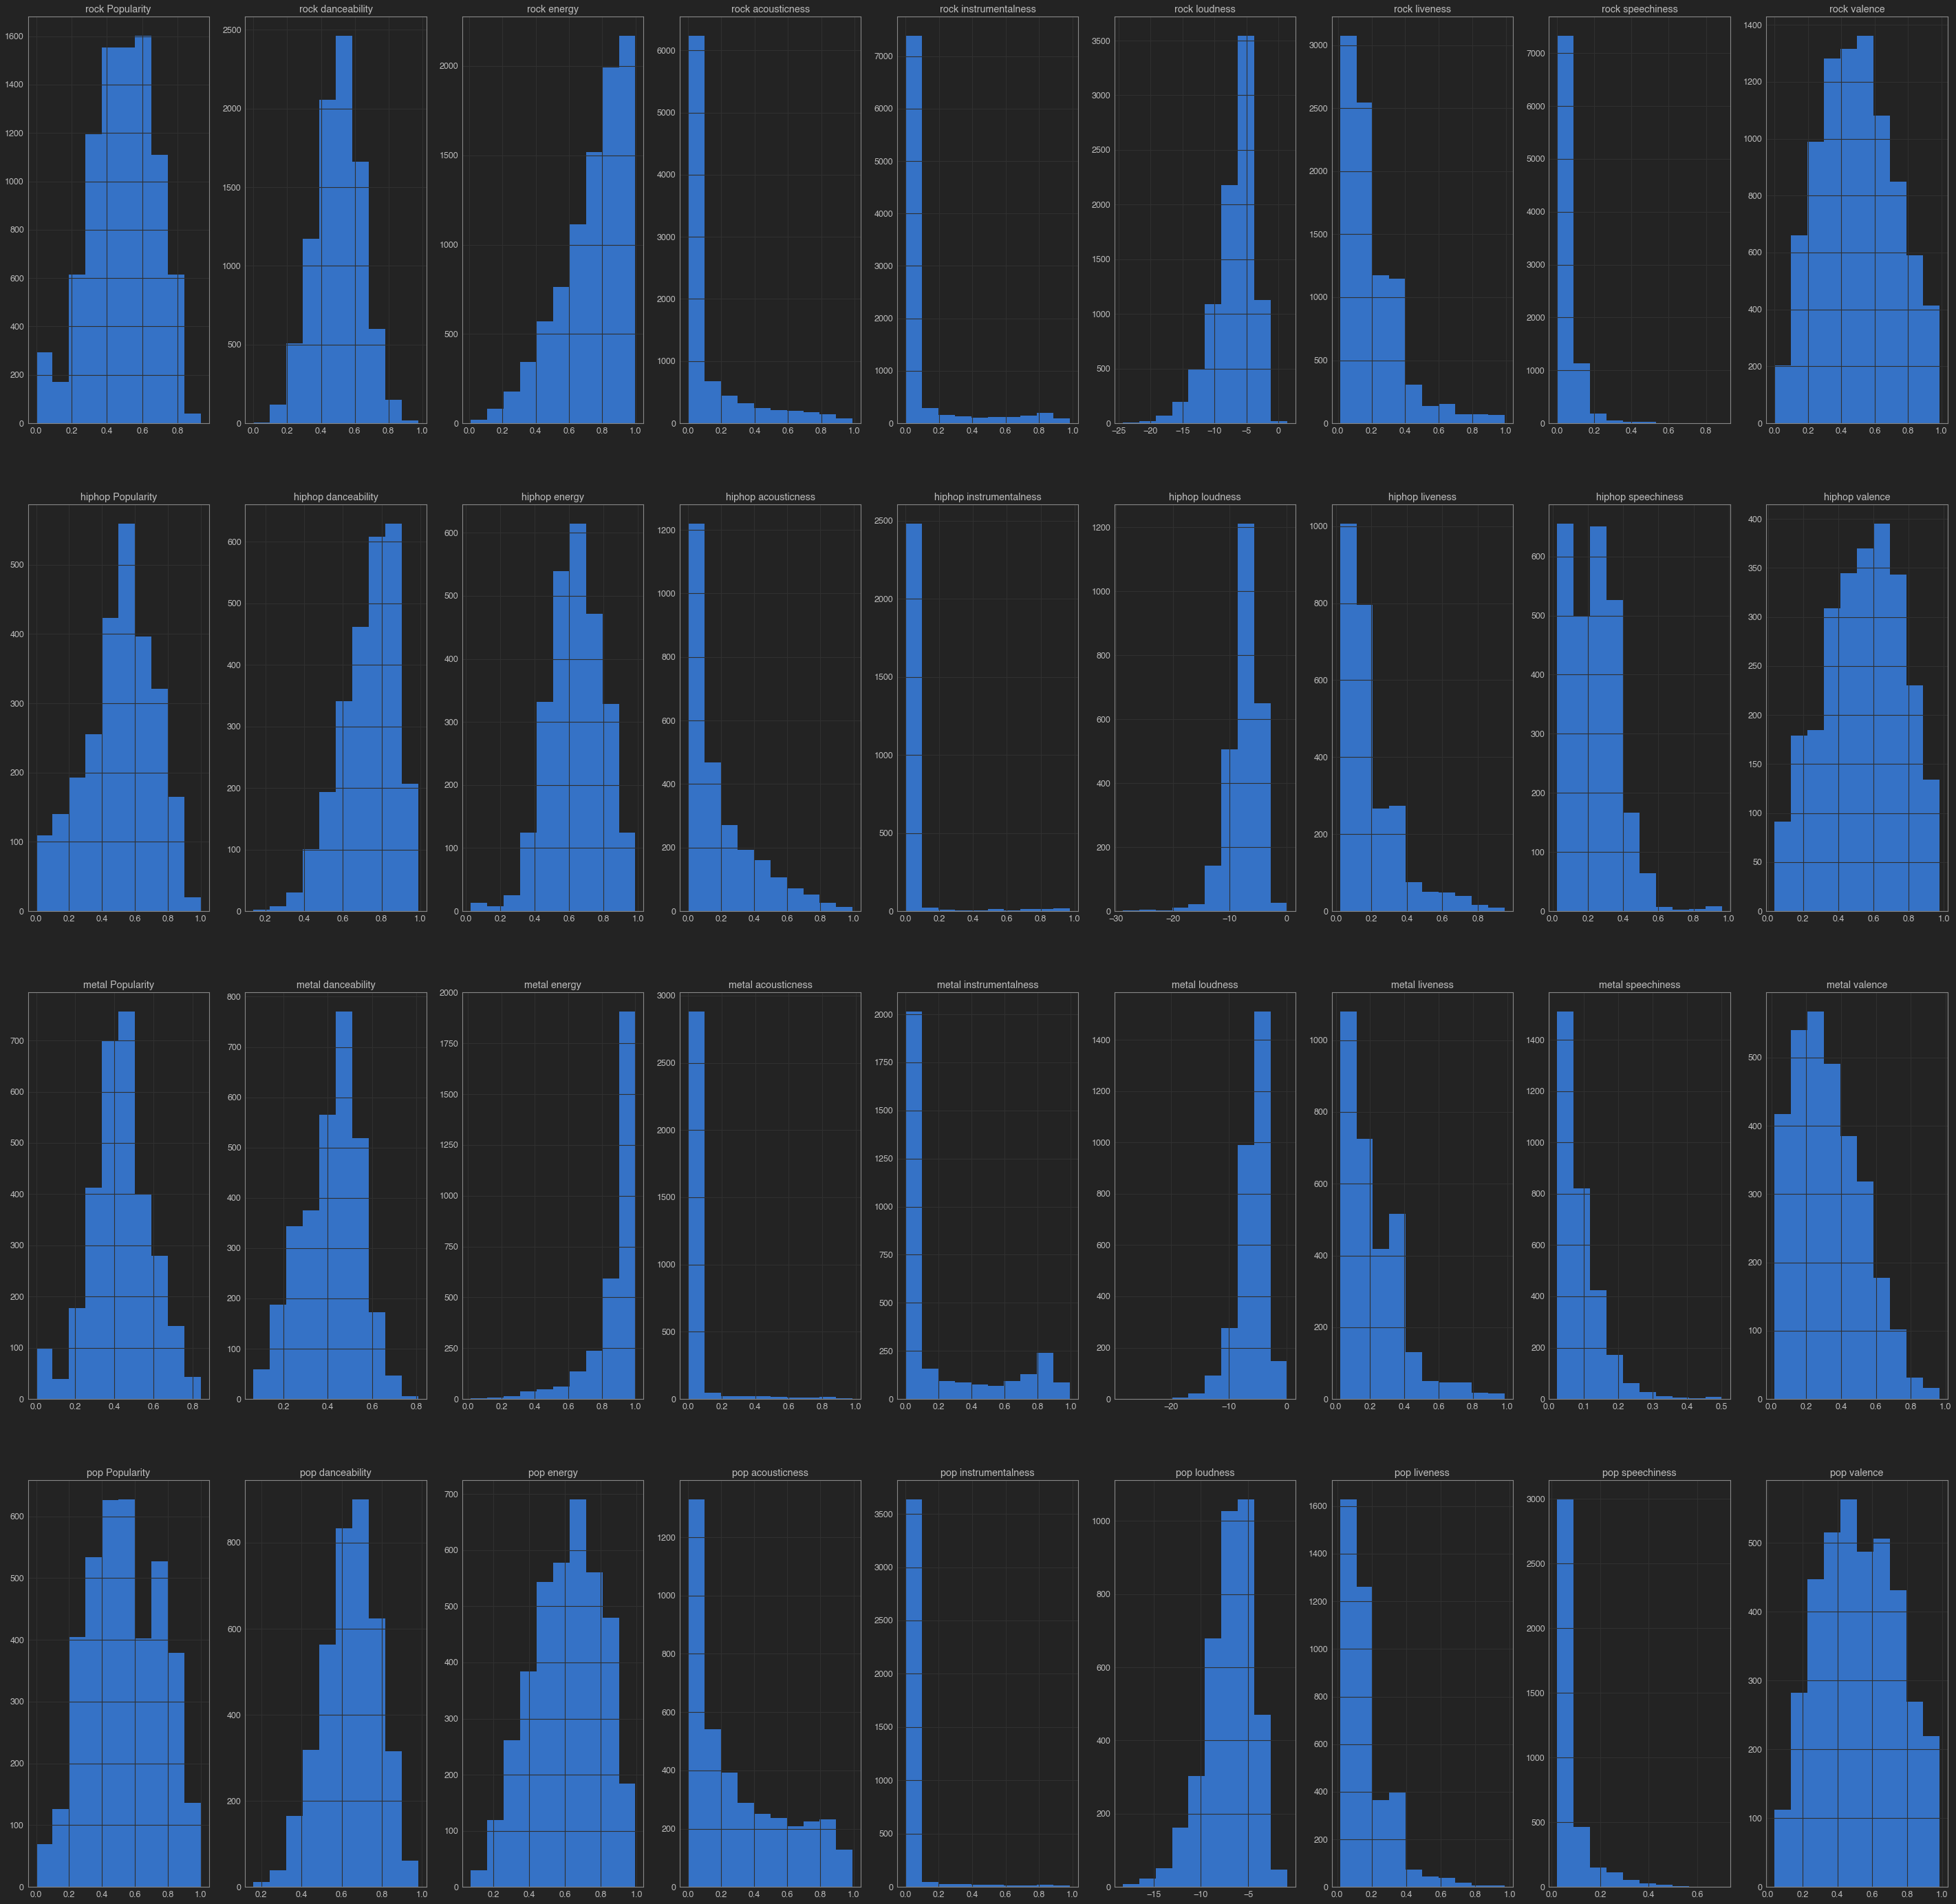

In [448]:
plt.figure()
fig,ax=plt.subplots(len(Genres),len(Features),figsize=(50,50))
for i in range(len(Genres)):
    sub=df_music.loc[Genres[i]]
    for y in range(len(Features)):
        ax[i,y].set_title("{} {}".format(Genres[i],Features[y]))
        ax[i,y].hist(sub[Features[y]])

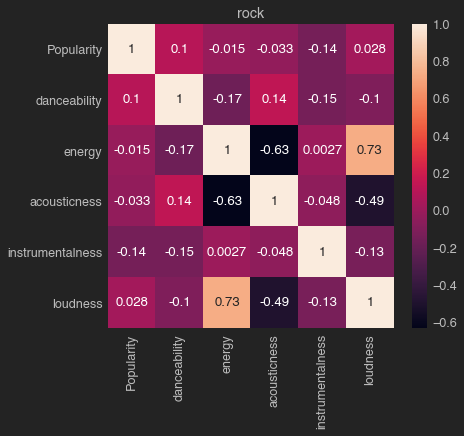

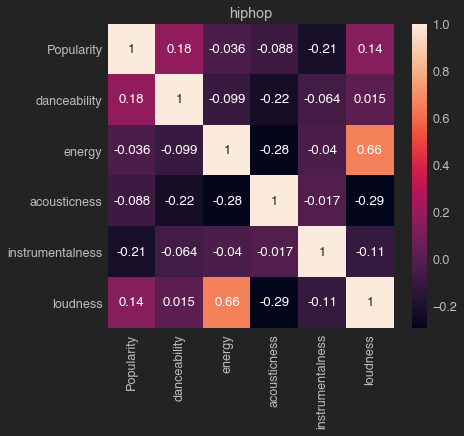

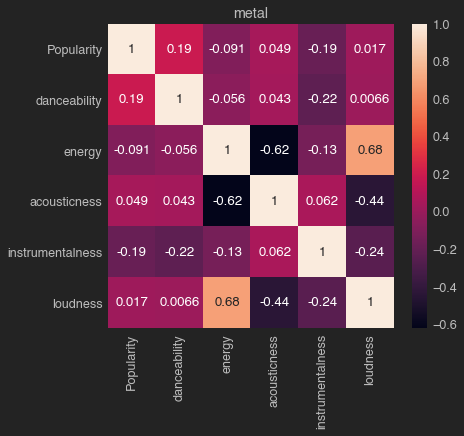

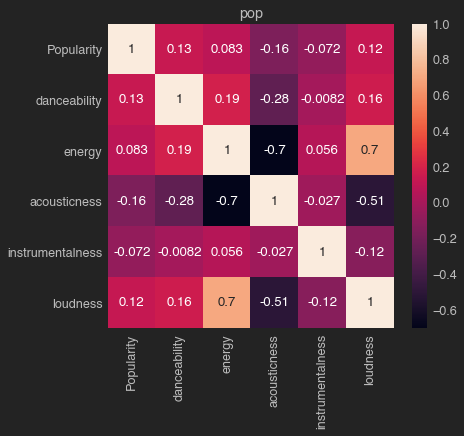

In [449]:
for i in range(len(Genres)):
    s=Genres[i]
    df_heat=pd.concat([df_music.loc[s]['Popularity'],df_music.loc[s]['danceability'],df_music.loc[s]['energy'],df_music.loc[s]['acousticness'],
                  df_music.loc[s]['instrumentalness'],df_music.loc[s]['loudness']],axis=1)
    ax = sns.heatmap(df_heat.corr(),annot=True)
    ax.set_title(s)
    plt.show()

# Build Base Model and Test

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, shuffle=True)

In [451]:
dict_classifier={
    'Logreg': LogisticRegression(solver='liblinear'),
    'RF': RandomForestClassifier(),
    'supvm': svm.SVC(),
    'tree': tree.DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'KNN':KNeighborsClassifier()
}

results = []
for model in dict_classifier:
    results.append(cross_val_score(dict_classifier[model], X, y = Y, scoring = "accuracy", cv = 5, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":['LogisticRegression','RandomForestClassifier','svm','tree','NB','KNN']})

In [452]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.665513,0.001747,LogisticRegression
1,0.730664,0.005400,RandomForestClassifier
2,0.638816,0.003980,svm
3,0.655901,0.008837,tree
4,0.610470,0.004510,NB
5,0.636838,0.007213,KNN


# Feature Engineering

In [453]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)
label_encoder = LabelEncoder()
Y=label_encoder.fit_transform(Y)

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X_train_minmax,Y,test_size=0.3, shuffle=True)

In [456]:

results = []
for model in dict_classifier:
    results.append(cross_val_score(dict_classifier[model], X_train_minmax, y = Y, scoring = "accuracy", cv = 5, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":[ 'LogisticRegression','RandomForestClassifier','svm','tree','NB','KNN']})

In [457]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.663206,0.002227,LogisticRegression
1,0.732147,0.004030,RandomForestClassifier
2,0.687377,0.001985,svm
3,0.655736,0.008780,tree
4,0.610470,0.004510,NB
5,0.660844,0.008266,KNN


# Parameter Tuning 

In [458]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [459]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 46.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [460]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    error=np.zeros(len(predictions))
    for i in range(len(predictions)):
        if predictions[i]==test_labels[i]:
            error[i]=0
        else:
            error[i]=1
            
    accuracy=(len(predictions)-np.sum(error))/len(predictions)*100     
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train,y_train)
base_accuracy = evaluate(base_model, X_test, y_test)


Model Performance
Accuracy = 71.75%.


In [461]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Accuracy = 73.64%.


In [462]:
print(best_random)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=2000)


In [463]:
param_grid = {'n_estimators': [700,800,900],
               'max_features': ['sqrt'],
               'max_depth': [40,50,80],
               'min_samples_split': [9,10,11],
               'min_samples_leaf': [3,4,5],
               'bootstrap': [True]}

In [464]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [465]:
grid_search.fit(X_train,y_train)
grid_search.best_params_


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 10.6min finished


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'n_estimators': 800}

In [467]:
best_grid=grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Accuracy = 73.45%.


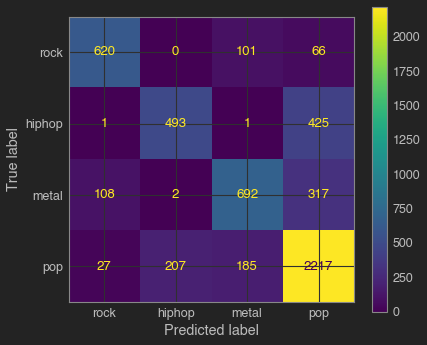

In [470]:
plot_confusion_matrix(best_random,X_test,y_test,display_labels=Genres)

# All Genres 

# Data Exploration 

In [472]:
Genres=['rock','blues','hiphop','indie','metal','pop','alt']
df_music=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7],keys=['rock','blues','hiphop','indie','metal','pop','alt'])
Y=df_music.index.get_level_values(0)
X=pd.concat([df_music['Popularity'],df_music['danceability'],df_music['energy'],df_music['acousticness'],
                  df_music['instrumentalness'],df_music['loudness'],df_music['liveness'],df_music['speechiness'],df_music['valence']],axis=1)
Features=['Popularity','danceability','energy','acousticness','instrumentalness','loudness','liveness','speechiness','valence']


<Figure size 460.8x403.2 with 0 Axes>

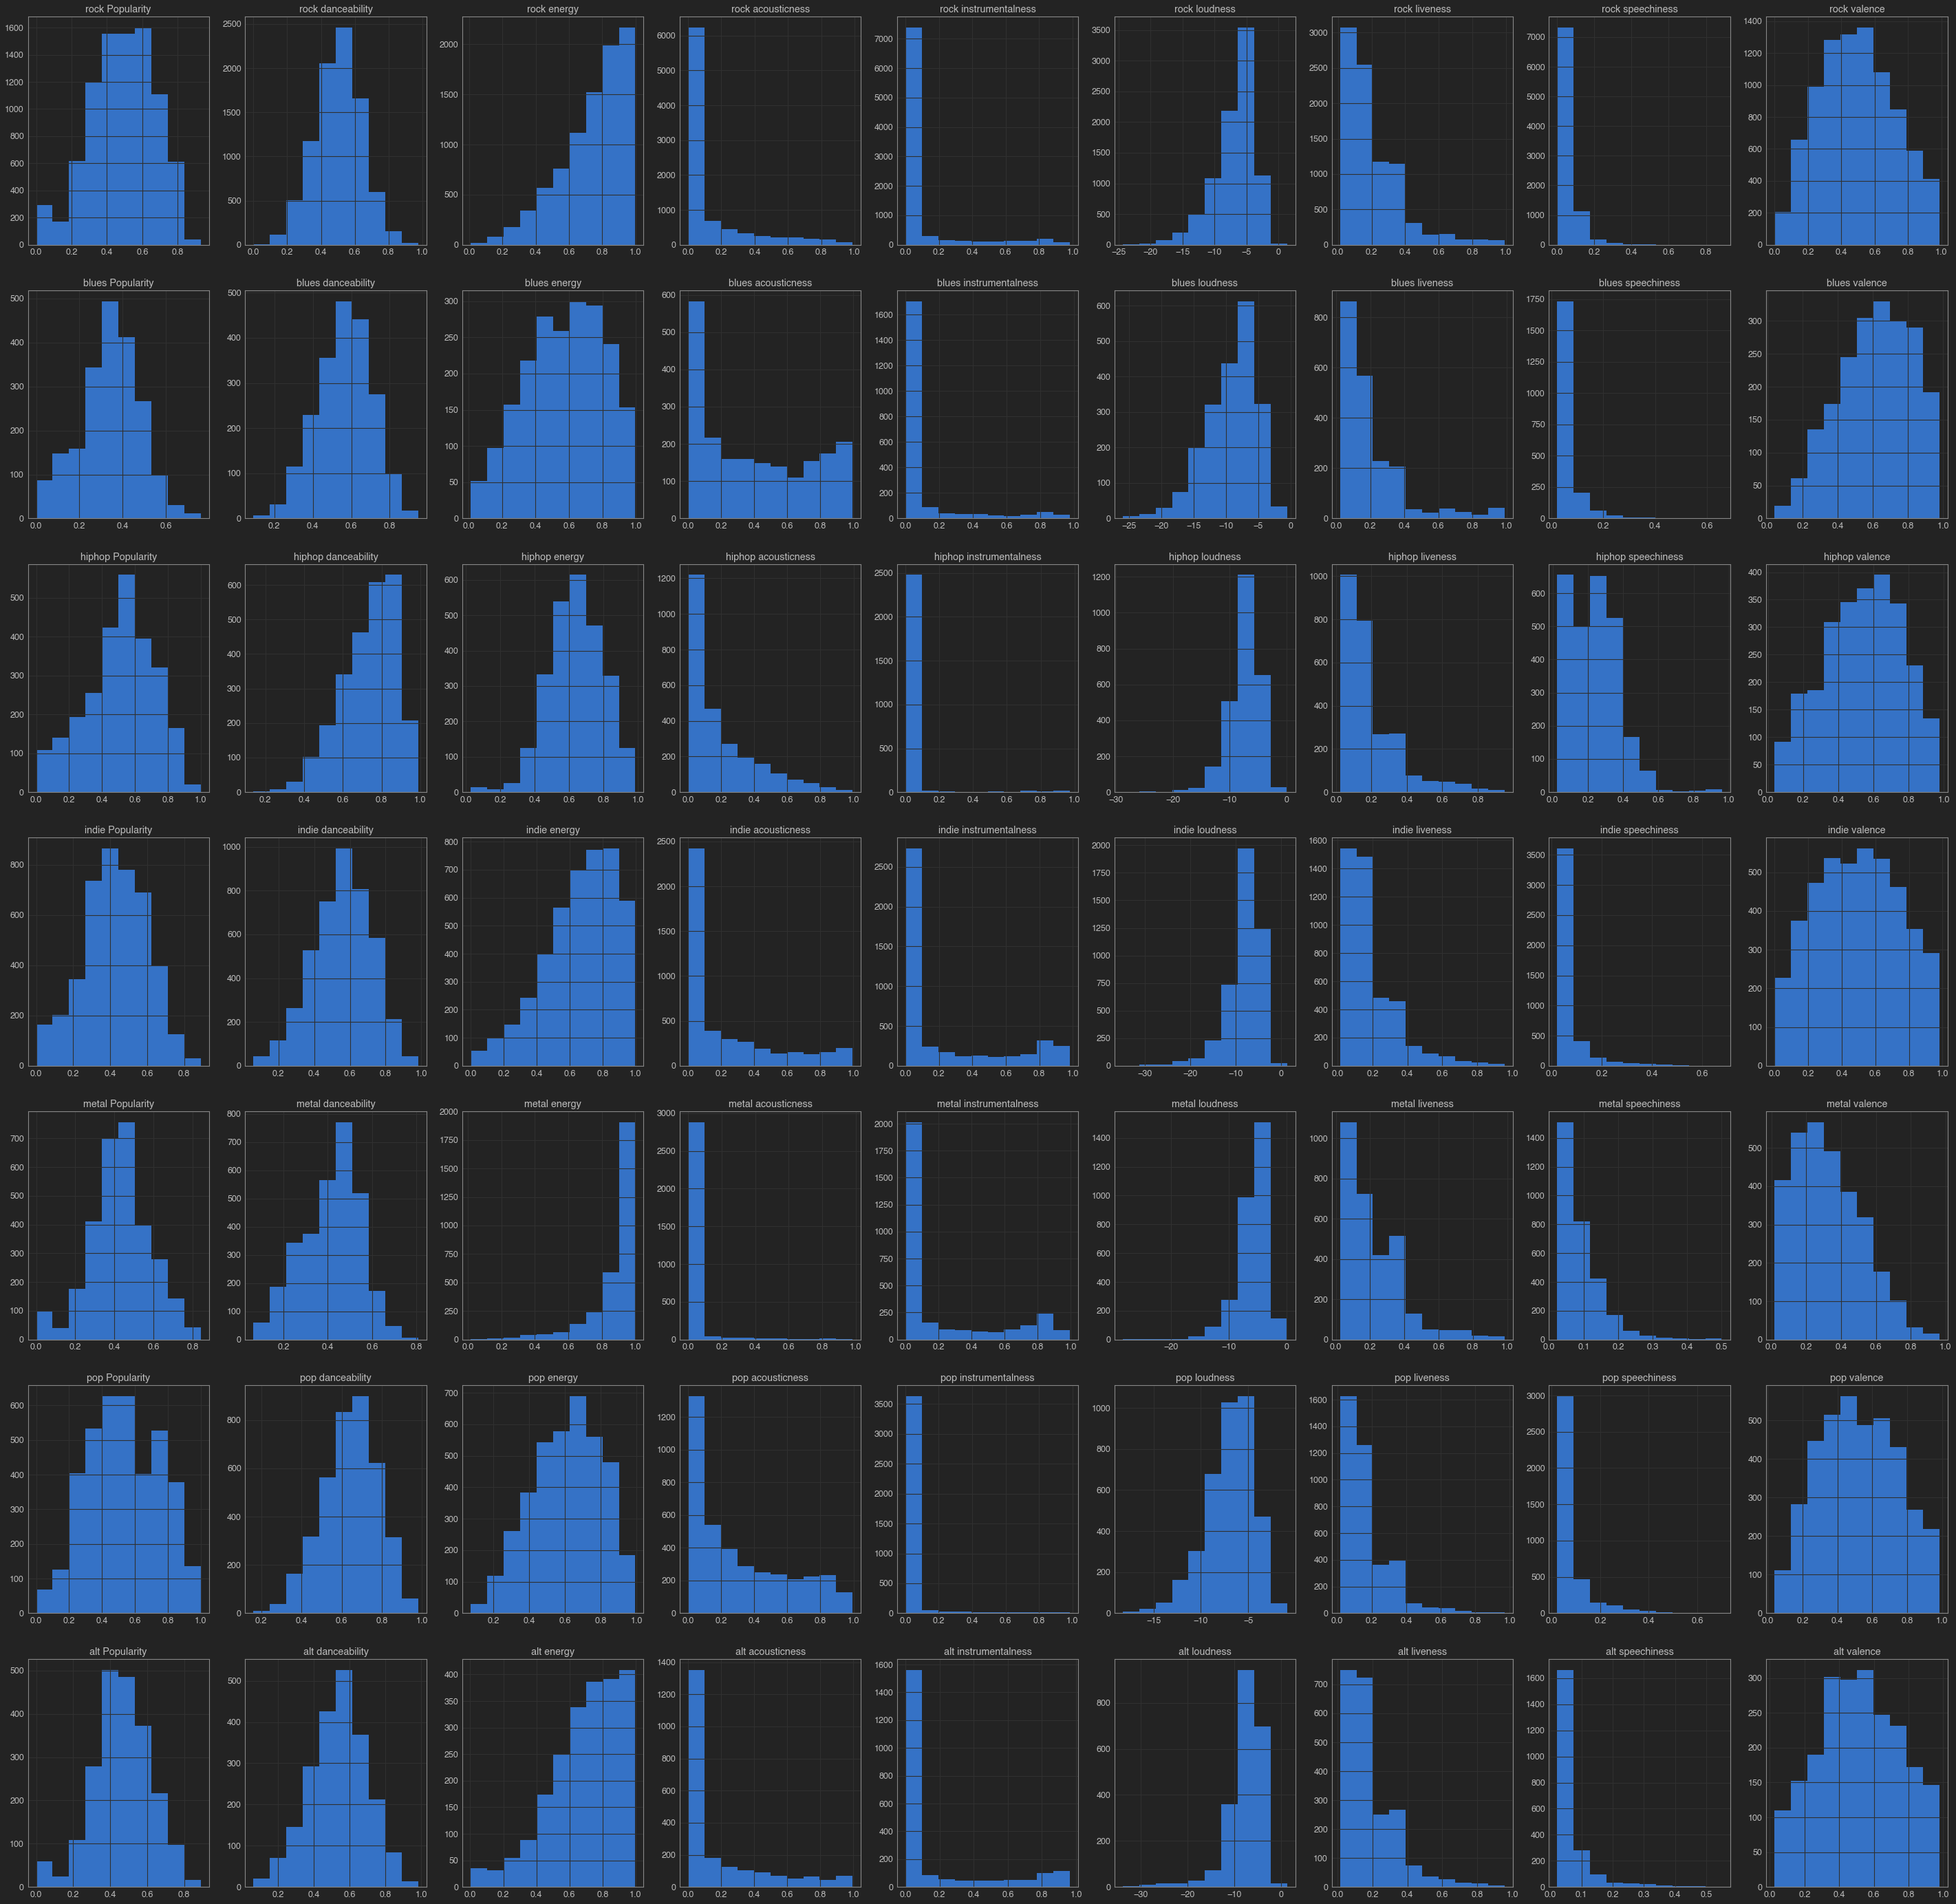

In [473]:
plt.figure()
fig,ax=plt.subplots(len(Genres),len(Features),figsize=(50,50))
for i in range(len(Genres)):
    sub=df_music.loc[Genres[i]]
    for y in range(len(Features)):
        ax[i,y].set_title("{} {}".format(Genres[i],Features[y]))
        ax[i,y].hist(sub[Features[y]])

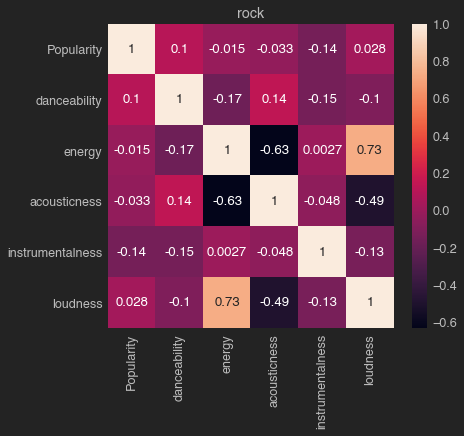

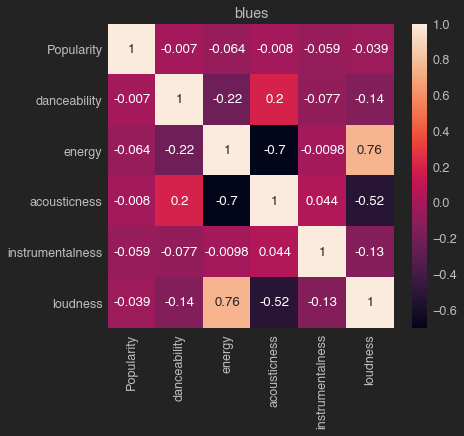

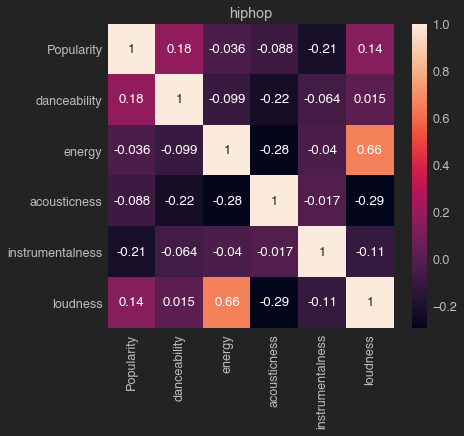

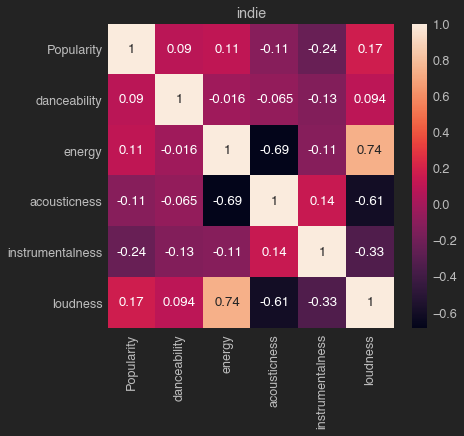

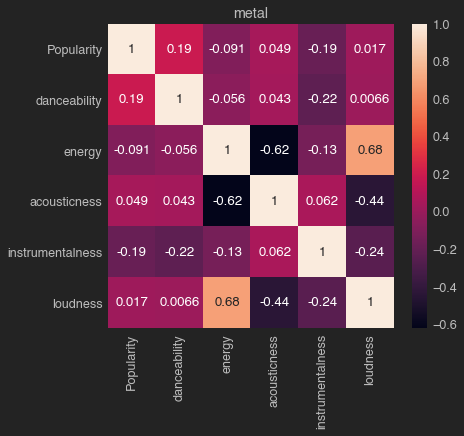

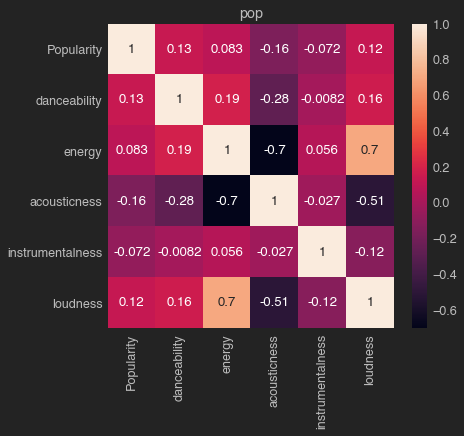

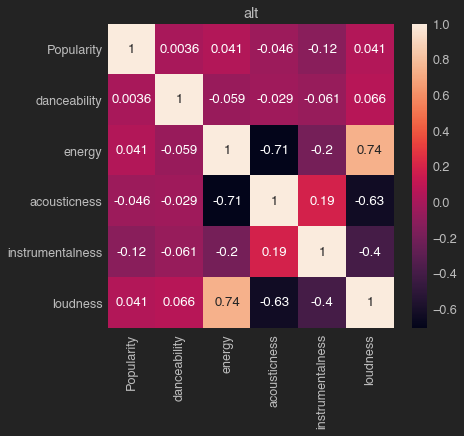

In [500]:
for i in range(len(Genres)):
    s=Genres[i]
    df_heat=pd.concat([df_music.loc[s]['Popularity'],df_music.loc[s]['danceability'],df_music.loc[s]['energy'],df_music.loc[s]['acousticness'],
                  df_music.loc[s]['instrumentalness'],df_music.loc[s]['loudness']],axis=1)
    map2=sns.heatmap(df_heat.corr(),annot=True)
    map2.set_title(s)
    plt.show()

# Base Model

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, shuffle=True)

In [502]:
dict_classifier={
    'Logreg': LogisticRegression(solver='liblinear'),
    'RF': RandomForestClassifier(),
    'supvm': svm.SVC(),
    'tree': tree.DecisionTreeClassifier(),
    'NB': GaussianNB(),
    'KNN':KNeighborsClassifier()
}

results = []
for model in dict_classifier:
    results.append(cross_val_score(dict_classifier[model], X, y = Y, scoring = "accuracy", cv = 5, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":['LogisticRegression','RandomForestClassifier','svm','tree','NB','KNN']})

In [503]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.481497,0.003236,LogisticRegression
1,0.542801,0.007362,RandomForestClassifier
2,0.455069,0.005037,svm
3,0.450396,0.003081,tree
4,0.439182,0.002187,NB
5,0.432117,0.004297,KNN


# Feature Engineering 

In [504]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)
label_encoder = LabelEncoder()
Y=label_encoder.fit_transform(Y)

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X_train_minmax,Y,test_size=0.3, shuffle=True)

In [506]:

results = []
for model in dict_classifier:
    results.append(cross_val_score(dict_classifier[model], X_train_minmax, y = Y, scoring = "accuracy", cv = 5, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":[ 'LogisticRegression','RandomForestClassifier','svm','tree','NB','KNN']})

In [507]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.480824,0.002205,LogisticRegression
1,0.542053,0.005511,RandomForestClassifier
2,0.504448,0.001760,svm
3,0.450322,0.004862,tree
4,0.439182,0.002187,NB
5,0.447555,0.009628,KNN


# Parameter Tuning 

In [508]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [509]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 79.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [510]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    error=np.zeros(len(predictions))
    for i in range(len(predictions)):
        if predictions[i]==test_labels[i]:
            error[i]=0
        else:
            error[i]=1
            
    accuracy=(len(predictions)-np.sum(error))/len(predictions)*100     
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train,y_train)
base_accuracy = evaluate(base_model, X_test, y_test)


Model Performance
Accuracy = 50.09%.


In [511]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Accuracy = 54.72%.


In [512]:
print(best_random)

RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=800)


In [513]:
param_grid = {'n_estimators': [700,800,900],
               'max_features': ['sqrt'],
               'max_depth': [40,50,80],
               'min_samples_split': [9,10,11],
               'min_samples_leaf': [3,4,5],
               'bootstrap': [True]}

In [514]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [515]:
grid_search.fit(X_train,y_train)
grid_search.best_params_


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 17.6min finished


{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 9,
 'n_estimators': 900}

In [516]:
best_grid=grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Accuracy = 54.67%.


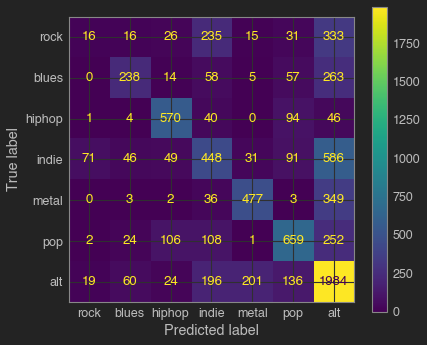

In [517]:
plot_confusion_matrix(best_random,X_test,y_test,display_labels=Genres)